## KNN Classification

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load iris data and store in dataframe
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [3]:
#print(iris.target)

In [4]:
# Separate X and y data

X = df.drop('target', axis=1)
y = df.target
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [5]:
# Calculate distance between two points
def minkowski_distance(a, b, p=1):
    # Store the number of dimensions
    dim = len(a)
    # Set initial distance to 0
    distance = 0
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    return distance

# Test the function
minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

In [6]:
# Define an arbitrary test point
test_pt = [4.8, 2.7, 2.5, 0.7]
# Calculate distance between test_pt and all points in X
distances = []
for i in X.index:
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [7]:
# Find the 5 nearest neighbors
df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


In [8]:
y[98]

1

In [9]:
df_nn.index

Int64Index([98, 57, 93, 24, 30], dtype='int64')

In [10]:
from collections import Counter
# Create counter object to track the labels
counter = Counter(y[df_nn.index])

In [11]:
print(counter)

Counter({1: 3, 0: 2})


In [12]:
counter.most_common()[0][0]

1

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Scale the X data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []
    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)
print(type(y_test))
print(type(y_hat_test))

<class 'pandas.core.series.Series'>
<class 'list'>


In [15]:
print(y_test)

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
91     1
135    2
69     1
128    2
114    2
48     0
53     1
28     0
Name: target, dtype: int64


In [16]:
print(y_hat_test)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [17]:
# Get test accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_hat_test))

0.9736842105263158


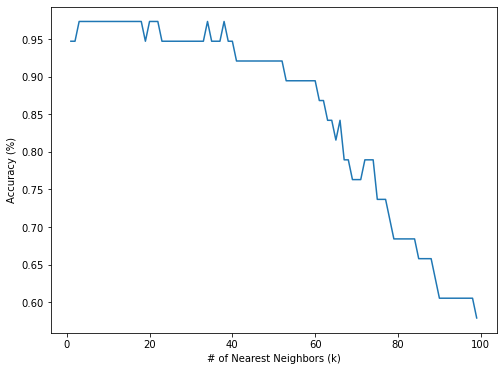

In [18]:
# Obtain accuracy score varying k from 1 to 99
accuracies = []
for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))
# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');